In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
tf.config.optimizer.set_experimental_options({"layout_optimizer": False})

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Set this to your directories
TRAIN_DIR = '/kaggle/input/butterfly/test'
VALID_DIR = '/kaggle/input/butterfly/validation'


In [3]:
# Image Data Generator for loading images
datagen = ImageDataGenerator(rescale=1./255)  

In [4]:
# Load images in batches from directories
train_gen = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 29245 images belonging to 75 classes.


In [5]:
valid_gen = datagen.flow_from_directory(
    VALID_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 650 images belonging to 75 classes.


In [6]:
input_shape = (224, 224, 3)
num_classes = 75

In [7]:
# Callbacks
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

In [8]:
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1,
    min_lr=1e-6
)

In [9]:
 #Model architecture with regularization and modified dropout
reg_strength = 0.001
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', kernel_regularizer=l2(reg_strength), input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(reg_strength)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.4),

    Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(reg_strength)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.5),

    Flatten(),

    Dense(512, activation='relu', kernel_regularizer=l2(reg_strength)),
    BatchNormalization(),
    Dropout(0.6),

    Dense(num_classes, activation='softmax')
])


In [10]:
#
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
# Training the model
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=valid_gen,
    callbacks=[early_stopping, lr_scheduler]
)qweq

Epoch 1/10
914/914 [==============================] - 157s 158ms/step - loss: 7.4531 - accuracy: 0.1754 - val_loss: 7.9372 - val_accuracy: 0.1538 - lr: 0.0010
Epoch 2/10
914/914 [==============================] - 122s 133ms/step - loss: 6.7985 - accuracy: 0.3394 - val_loss: 6.8617 - val_accuracy: 0.4323 - lr: 0.0010
Epoch 3/10
914/914 [==============================] - 122s 133ms/step - loss: 7.5944 - accuracy: 0.4136 - val_loss: 9.3970 - val_accuracy: 0.3200 - lr: 0.0010
Epoch 4/10
914/914 [==============================] - ETA: 0s - loss: 8.5287 - accuracy: 0.4644
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
914/914 [==============================] - 122s 134ms/step - loss: 8.5287 - accuracy: 0.4644 - val_loss: 8.8658 - val_accuracy: 0.4354 - lr: 0.0010
Epoch 5/10
914/914 [==============================] - 122s 133ms/step - loss: 5.8617 - accuracy: 0.6410 - val_loss: 4.6377 - val_accuracy: 0.6431 - lr: 2.0000e-04
Epoch 6/10
914/914 [===================

In [12]:
# Print final accuracy and loss for training and validation sets
final_train_accuracy = history.history['accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]

In [13]:
print(f"Final Training Accuracy: {final_train_accuracy * 100:.2f}%")

Final Training Accuracy: 85.61%


In [14]:
print(f"Final Validation Accuracy: {final_val_accuracy * 100:.2f}%")

Final Validation Accuracy: 71.08%


In [15]:
import matplotlib.pyplot as plt

In [16]:
plt.figure(figsize=(12, 4))


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Text(0.5, 1.0, 'Training vs Validation Accuracy')

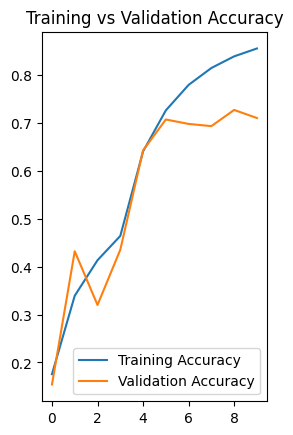

In [17]:
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

Text(0.5, 1.0, 'Training vs Validation Loss')

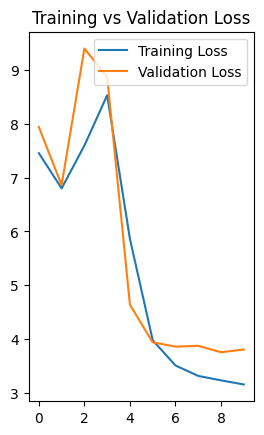

In [18]:
# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training vs Validation Loss')


In [19]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [20]:
from sklearn.metrics import classification_report
import numpy as np


In [21]:
Y_pred = model.predict(valid_gen)
y_pred = np.argmax(Y_pred, axis=1)

21/21 [==============================] - 2s 64ms/step


In [22]:
y_true = valid_gen.classes


In [23]:
class_labels = list(valid_gen.class_indices.keys())

In [24]:
report = classification_report(y_true, y_pred, target_names=class_labels)

In [25]:
print(report)

                           precision    recall  f1-score   support

                   ADONIS       0.00      0.00      0.00         9
AFRICAN GIANT SWALLOWTAIL       0.00      0.00      0.00         7
           AMERICAN SNOOT       0.00      0.00      0.00         7
                    AN 88       0.00      0.00      0.00         8
                  APPOLLO       0.00      0.00      0.00         9
                    ATALA       0.00      0.00      0.00        10
 BANDED ORANGE HELICONIAN       0.00      0.00      0.00        10
           BANDED PEACOCK       0.00      0.00      0.00         8
            BECKERS WHITE       0.00      0.00      0.00         8
         BLACK HAIRSTREAK       0.00      0.00      0.00         8
              BLUE MORPHO       0.00      0.00      0.00         7
        BLUE SPOTTED CROW       0.00      0.00      0.00         9
           BROWN SIPROETA       0.00      0.00      0.00        10
            CABBAGE WHITE       0.00      0.00      0.00     